# Import and Setting

In [1]:
import pandas as pd

# Load the Data


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
full_data=pd.read_csv('/content/drive/MyDrive/ML_Training/rentals.csv')


In [5]:
print(full_data)

     area  bedrooms  furnished   rent
0     650         2          1  33000
1     750         3          0  55000
2     247         1          0  10500
3    1256         4          0  65000
4     900         3          0  37000
..    ...       ...        ...    ...
495  1200         3          0  47200
496  1132         3          0  42200
497   820         3          2  54200
498   620         3          0  30200
499   320         2          0  18200

[500 rows x 4 columns]


In [6]:
full_data

,area,bedrooms,furnished,rent
0,650,2,1,33000
1,750,3,0,55000
2,247,1,0,10500
3,1256,4,0,65000
4,900,3,0,37000
...,...,...,...,...
495,1200,3,0,47200
496,1132,3,0,42200
497,820,3,2,54200
498,620,3,0,30200


# Examin the data

In [7]:
full_data.shape

(500, 4)

In [8]:
full_data.describe()

,area,bedrooms,furnished,rent
count,500.000000,500.000000,500.000000,500.000000
mean,797.236000,2.524000,0.334000,38615.200000
std,469.241656,0.989638,0.701018,19717.969612
min,212.000000,1.000000,0.000000,9000.000000
25%,400.000000,2.000000,0.000000,20800.000000
50%,691.000000,2.000000,0.000000,35000.000000
75%,1052.500000,3.000000,0.000000,50000.000000
max,1970.000000,4.000000,2.000000,95000.000000


In [9]:
full_data['bedrooms'].value_counts()

2    168
3    150
4     98
1     84
Name: bedrooms, dtype: int64

In [10]:
full_data['furnished'].value_counts()

0    400
2     67
1     33
Name: furnished, dtype: int64

In [11]:
full_data.corr()

,area,bedrooms,furnished,rent
area,1.000000,0.909483,0.005468,0.928966
bedrooms,0.909483,1.000000,0.030308,0.897170
furnished,0.005468,0.030308,1.000000,0.045185
rent,0.928966,0.897170,0.045185,1.000000


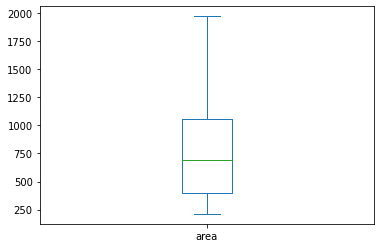

In [12]:
full_data['area'].plot(kind='box')

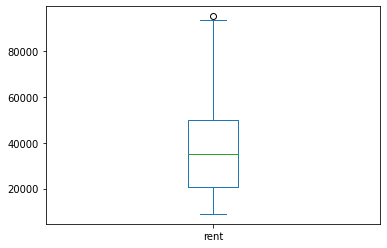

In [13]:
full_data['rent'].plot(kind='box')

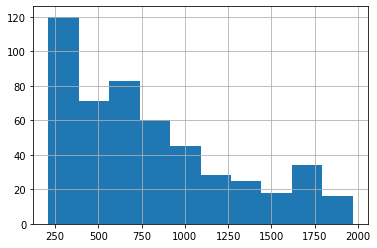

In [14]:
full_data['area'].hist()

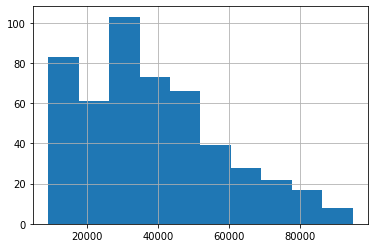

In [15]:
full_data['rent'].hist(bins=10)

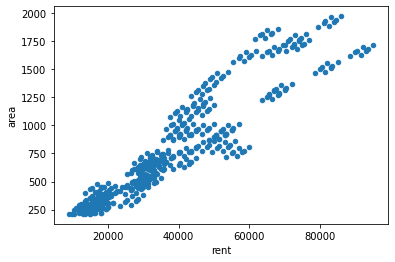

In [16]:
full_data.plot(kind='scatter',x='rent',y='area')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f241bd674d0>,
      dtype=object)

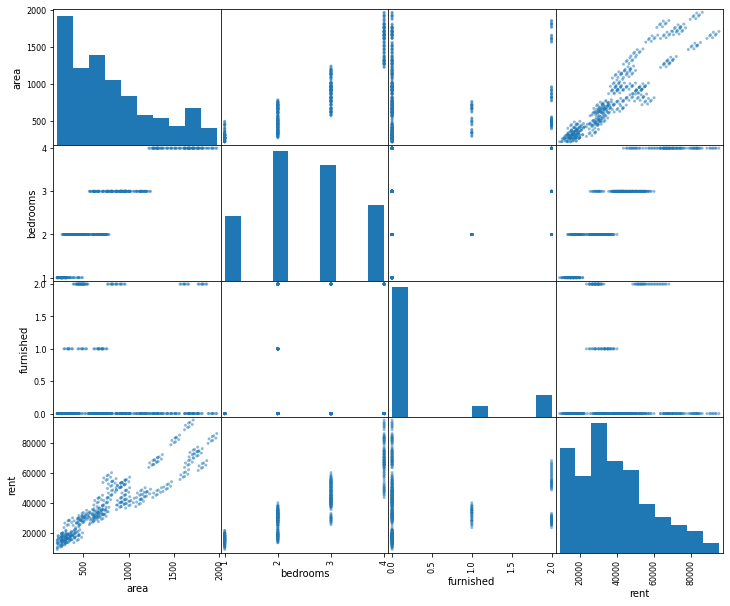

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(full_data,figsize=(12,10))

# Linear Regression

In [57]:
dataX=full_data.drop(columns=['rent'])
dataY=pd.DataFrame({'rent':full_data.rent})

In [58]:
dataX

,area,bedrooms,furnished
0,650,2,1
1,750,3,0
2,247,1,0
3,1256,4,0
4,900,3,0
...,...,...,...
495,1200,3,0
496,1132,3,0
497,820,3,2
498,620,3,0


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size=0.20, random_state=11)

In [61]:
trainX

,area,bedrooms,furnished
14,247,1,0
493,742,2,0
56,1112,3,0
266,1050,3,0
179,265,2,0
...,...,...,...
337,1970,4,0
91,760,3,0
80,660,2,0
191,775,3,0


In [62]:
trainY

,rent
14,16500
493,35200
56,39000
266,40000
179,13500
...,...
337,86000
91,43000
80,34000
191,46500


In [63]:
testX

,area,bedrooms,furnished
247,1750,4,0
239,275,2,0
70,485,2,1
136,295,2,0
387,915,3,2
...,...,...,...
230,675,2,0
487,510,2,2
153,1275,4,0
290,750,2,0


In [64]:
testY

,rent
247,74000
239,16500
70,33000
136,14500
387,50500
...,...
230,30500
487,30200
153,65500
290,31000


In [65]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [66]:
model.fit(trainX,trainY)

LinearRegression()

In [67]:
# WHAT HAS MODEL LEARNED
# Hypothesis: theta0 + theta1 *area + theta2*bedrooms + theta3 * furnished
# theta0 = intercept
print ('Intercept:' , model.intercept_)
print ('coefficients:' , model.coef_)

Intercept: [911.10583316]
coefficients: [[  27.47818646 6103.32726175  840.41313154]]


In [68]:
predictions = model.predict(testX)
type(predictions)



numpy.ndarray

In [69]:
result=pd.DataFrame({'prediction': predictions.flatten(), 'actual' : testY.rent})
type(result)

pandas.core.frame.DataFrame

In [70]:
model.score(trainX,trainY)

0.8840497413405322

In [71]:
model.score(testX,testY)

0.8615809250320268

In [33]:
area=input('Enter the area: ')
bedrooms=input('Enter the number of bedroom:')
furnished=input('Enter the furnished value 0-2 :')

myData = pd.DataFrame({'area':area,'bedrooms':bedrooms, 'furnished':furnished}, index=[0])
prediction=model.predict(myData)
prediction


Enter the area: 1000
Enter the number of bedroom:2
Enter the furnished value 0-2 :1


array([[41436.35995125]])

In [34]:
prediction=model.predict(myData)
prediction

array([[41436.35995125]])

# SGD Regressor

In [72]:
from sklearn.linear_model import SGDRegressor

#model = SGDRegressor(verbose=1, max_iter=10,eta0=0.00000003, shuffle=False)
model = SGDRegressor(eta0=0.0000003, shuffle=False)
model.fit(trainX,trainY.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDRegressor(eta0=3e-07, shuffle=False)

In [73]:
print('intercept:',model.intercept_)
print ('coefficients:' , model.coef_)
print('Score:',model.score(trainX,trainY))

intercept: [11.90095941]
coefficients: [46.51239933 18.33058368  6.52760522]
Score: 0.8324715193599265


In [76]:
from joblib import dump
dump_file = '/content/drive/MyDrive/ML_Training/rentals_dump.dmp'
dump(model,dump_file)

['/content/drive/MyDrive/ML_Training/rentals_dump.dmp']



# Standard Scaler and SGD

In [54]:
dataX=full_data.drop(columns=['rent'])
dataY=pd.DataFrame({'rent':full_data.rent})

trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size=0.20, random_state=11)

dataX.describe()

,area,bedrooms,furnished
count,500.000000,500.000000,500.000000
mean,797.236000,2.524000,0.334000
std,469.241656,0.989638,0.701018
min,212.000000,1.000000,0.000000
25%,400.000000,2.000000,0.000000
50%,691.000000,2.000000,0.000000
75%,1052.500000,3.000000,0.000000
max,1970.000000,4.000000,2.000000


In [55]:
testX.describe()

,area,bedrooms,furnished
count,100.00000,100.000000,100.000000
mean,782.36000,2.490000,0.440000
std,460.33555,0.989796,0.795442
min,247.00000,1.000000,0.000000
25%,410.50000,2.000000,0.000000
50%,662.50000,2.000000,0.000000
75%,966.25000,3.000000,0.250000
max,1960.00000,4.000000,2.000000


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
trainX


array([[-1.17526044, -1.5488937 , -0.45690192],
       [-0.12507781, -0.53819634, -0.45690192],
       [ 0.65990718,  0.47250102, -0.45690192],
       ...,
       [-0.29904746, -0.53819634, -0.45690192],
       [-0.05506564,  0.47250102, -0.45690192],
       [ 1.51490435,  1.48319837, -0.45690192]])

In [40]:
trainX=pd.DataFrame(trainX,columns=['area','bedrooms','furnished'])

In [41]:
trainX.describe()

,area,bedrooms,furnished
count,4.000000e+02,4.000000e+02,4.000000e+02
mean,-7.993606e-17,-1.709743e-16,4.440892e-18
std,1.001252e+00,1.001252e+00,1.001252e+00
min,-1.249516e+00,-1.548894e+00,-4.569019e-01
25%,-8.506585e-01,-5.381963e-01,-4.569019e-01
50%,-2.141842e-01,4.725010e-01,-4.569019e-01
75%,6.036853e-01,4.725010e-01,-4.569019e-01
max,2.480224e+00,1.483198e+00,2.514818e+00


In [42]:
testX=scaler.transform(testX)
testX=pd.DataFrame(testX,columns=['area','bedrooms','furnished'])

In [43]:
testX.describe()

,area,bedrooms,furnished
count,100.000000,100.000000,100.000000
mean,-0.039451,-0.042955,0.196876
std,0.976639,1.000385,1.181915
min,-1.175260,-1.548894,-0.456902
25%,-0.828382,-0.538196,-0.456902
50%,-0.293744,-0.538196,-0.456902
75%,0.350687,0.472501,-0.085437
max,2.459008,1.483198,2.514818


In [44]:
from sklearn.linear_model import SGDRegressor

#model = SGDRegressor(verbose=1, max_iter=10,eta0=0.00000003, shuffle=False)
model = SGDRegressor(eta0=0.01, shuffle=False)
model.fit(trainX,trainY.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDRegressor(shuffle=False)

In [45]:
print('intercept:',model.intercept_)
print ('coefficients:' , model.coef_)
print('Score:',model.score(trainX,trainY))

intercept: [38655.98767685]
coefficients: [12983.62072968  6084.57179002   582.74163854]
Score: 0.8840330743704874


# Derived Expression + StandardScaler + SGD

In [46]:
import numpy as np
new_data = full_data.copy()
new_data['spaciousness'] = new_data['area']/(new_data['bedrooms'] + 1)
new_data['br_square'] = new_data['bedrooms']*new_data['bedrooms']
new_data['area_sqrt'] = np.sqrt(new_data['area'])

In [47]:
dataX=new_data.drop(columns=['rent'])
dataY = pd.DataFrame(new_data['rent'])

trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size=0.20, random_state=11)

In [48]:
from typing import List
scaler = StandardScaler()
trainX.columns
collist=trainX.columns.tolist()
collist


['area', 'bedrooms', 'furnished', 'spaciousness', 'br_square', 'area_sqrt']

In [49]:
trainX=scaler.fit_transform(trainX)
trainX = pd.DataFrame(trainX, columns=collist)

In [50]:
testX=scaler.transform(testX)
testX = pd.DataFrame(testX, columns=collist)

In [51]:
from sklearn.linear_model import SGDRegressor

#model = SGDRegressor(verbose=1, max_iter=10,eta0=0.00000003, shuffle=False)
model = SGDRegressor(eta0=0.01, shuffle=False)

In [52]:
model.fit(trainX,trainY)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDRegressor(shuffle=False)

In [53]:
print('intercept:',model.intercept_)
print ('coefficients:' , model.coef_)
print('Score:',model.score(trainX,trainY))

intercept: [38652.0168285]
coefficients: [4640.51180588  644.97756221  687.94072951  282.49513923 5931.71773514
 7651.11571031]
Score: 0.8863888314656174
